# <span style="color:red"> Lecture 18 - Time Data </span>

<font size = "4">

In this class we will ...

- Process time series data in Python and Pandas
- Introduce new datatype for time
- Plot multiple series
- Compute growth rates

First, let's import the libraries we'll need, and load in the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df_financial = pd.read_csv("data_raw/financial.csv")

<font size = "4">

The data can be downloaded from [FRED (Federal Reserve Bank of St. Louis)](https://fred.stlouisfed.org/categories/32255)

Let's inspect the data, and its dtypes:

In [2]:
display(df_financial.head())
print()
display(df_financial.dtypes)

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3
0,4/4/2018,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04",4-Apr-18
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18


date_str     object
sp500       float64
djia        float64
date_ex1     object
date_ex2     object
date_ex3     object
dtype: object

<font size = "4">

The columns represent:

- First column: date (month, day, year)
- Second column: the S&P 500 stock market index
- Third column: the Dow Jones Industrial Average stock market index
- Columns 4, 5, 6: Other representations of the date. We will discuss them next lecture

<font size = "4">

Notice that the data is ordered from oldest to newest:

In [3]:
print(df_financial["date_str"].iloc[0])
print(df_financial["date_str"].iloc[1])
print("...")
print(df_financial["date_str"].iloc[-2])
print(df_financial["date_str"].iloc[-1])

4/4/2018
4/5/2018
...
4/3/2023
4/4/2023


<font size = "4">

**Question:** What if I want the data arranged in the other order (newest first)? How can I use ``.sort_values()`` to re-order the data?

In [4]:
# Use .sort_values() to sort data newest to oldest

new_df = df_financial.sort_values(by = "date_str", ascending = False)
display(new_df)

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3
1157,9/9/2022,4067.36,32151.71,September 09 2022,"Friday, 2022-09-09",9-Sep-22
896,9/9/2021,4493.28,34879.38,September 09 2021,"Thursday, 2021-09-09",9-Sep-21
635,9/9/2020,3398.96,27940.47,September 09 2020,"Wednesday, 2020-09-09",9-Sep-20
373,9/9/2019,2978.43,26835.51,September 09 2019,"Monday, 2019-09-09",9-Sep-19
1156,9/8/2022,4006.18,31774.52,September 08 2022,"Thursday, 2022-09-08",8-Sep-22
...,...,...,...,...,...,...
462,1/10/2020,3265.35,28823.77,January 10 2020,"Friday, 2020-01-10",10-Jan-20
201,1/10/2019,2596.64,24001.92,January 10 2019,"Thursday, 2019-01-10",10-Jan-19
717,1/1/2021,NaN,NaN,January 01 2021,"Friday, 2021-01-01",1-Jan-21
455,1/1/2020,NaN,NaN,January 01 2020,"Wednesday, 2020-01-01",1-Jan-20


<font size = "4">

If you try to sort dates that are represented by *strings*, they will be sorted "lexicographically" (alphabetically).

The strings representing the dates must be converted to a new datatype, the ``datetime`` format.

This can be done with the Pandas function ``to_datetime``

In [5]:
# Use the Pandas datetime to convert the column to datetime format 
# We'll add a new column to the DataFrame

df_financial["date"] = pd.to_datetime(df_financial["date_str"])
display(df_financial.head())

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date
0,4/4/2018,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04",4-Apr-18,2018-04-04
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10


<font size = "4">

Let's check the DataTypes again

In [6]:
display(df_financial.dtypes)

date_str            object
sp500              float64
djia               float64
date_ex1            object
date_ex2            object
date_ex3            object
date        datetime64[ns]
dtype: object

<font size = "4">

Compare with the types of the column elements:

In [7]:
print(type(df_financial['date_str'].iloc[0]))
print(type(df_financial['sp500'].iloc[0]))
print(type(df_financial['date'].iloc[0])) 

<class 'str'>
<class 'numpy.float64'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


<font size = "4">

- So the "date" column has the datatype ``datetime64[ns]``, but its elements are Pandas ``Timestamp`` objects.

- ????

- There is a difference between how Pandas stores data "internally" and when you extract parts of the data.

- We've actually seen this before. Note that the "date_str" column has the datatype ``object``, but its elements are ``str`` (strings).

Regardless, now that we have converted the dates to an appropriate datatype, we can now sort them sensibly!

In [8]:
# sort df_financial by the "date" column

new_df = df_financial.sort_values(by = "date", ascending = False)
display(new_df)


,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date
1304,4/4/2023,4100.60,33402.38,April 04 2023,"Tuesday, 2023-04-04",4-Apr-23,2023-04-04
1303,4/3/2023,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03",3-Apr-23,2023-04-03
1302,3/31/2023,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31",31-Mar-23,2023-03-31
1301,3/30/2023,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30",30-Mar-23,2023-03-30
1300,3/29/2023,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29",29-Mar-23,2023-03-29
...,...,...,...,...,...,...,...
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05


<font size = "4">

How can I plot time vs. the S&P 500 index?

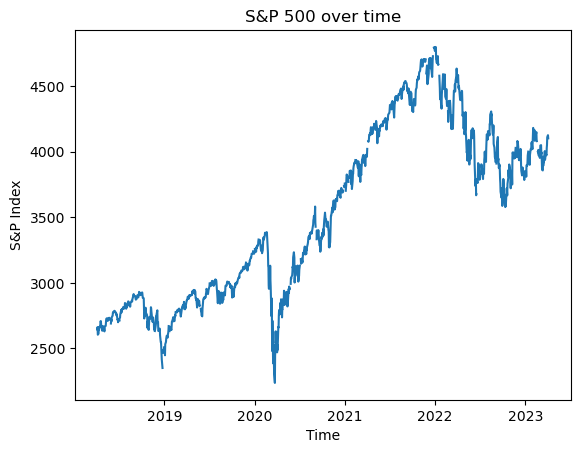

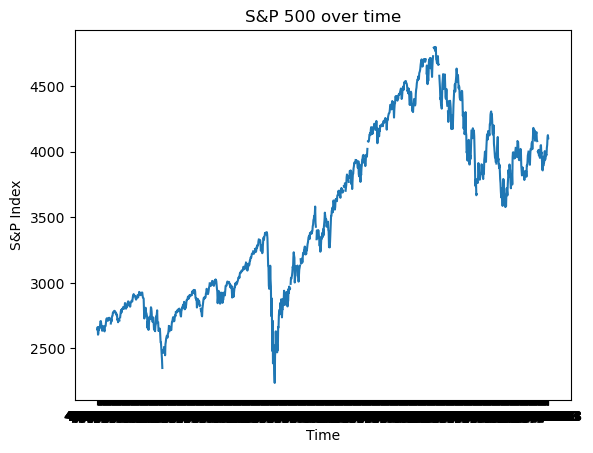

In [9]:
# Goal: plot date (x-axis) vs. S&P 500 (y-axis)

x_vals = df_financial["date"]
y_vals = df_financial["sp500"]
plt.plot(x_vals, y_vals)
# label x-axis
plt.xlabel("Time")

# label y-axis
plt.ylabel("S&P Index")
# title
plt.title("S&P 500 over time")
plt.show()

####################################################################

## What if we plot using "date_str" column instead of "date" column?

x_vals = df_financial["date_str"]
y_vals = df_financial["sp500"]
plt.plot(x_vals, y_vals)
# label x-axis
plt.xlabel("Time")

# label y-axis
plt.ylabel("S&P Index")
# title
plt.title("S&P 500 over time")
plt.show()


<font size = "4">

So there's another advantage of converting to ``datetime`` objects...plots look much better!

**Note**: ``matplotlib.pyplot.plot`` has compatibility with Pandas DataFrames:

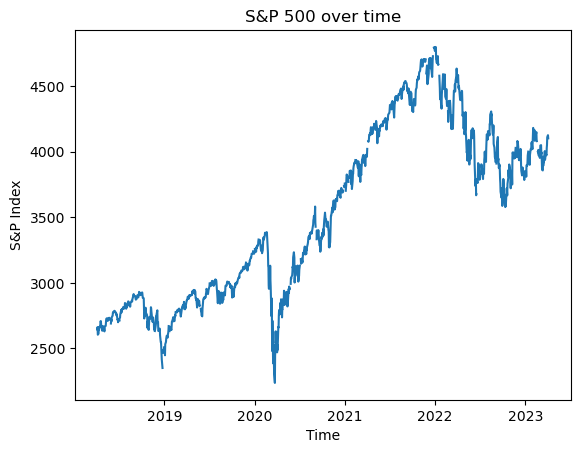

In [10]:
# Another way of using plt.plot with the "data" argument

plt.plot("date", "sp500", data = df_financial)
# label x-axis
plt.xlabel("Time")

# label y-axis
plt.ylabel("S&P Index")
# title
plt.title("S&P 500 over time")
plt.show()


<font size = "4">

**Important:** Whatever variable you put on the x-axis, the data better be sorted by that variable!!

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date
513,3/23/2020,2237.40,18591.93,March 23 2020,"Monday, 2020-03-23",23-Mar-20,2020-03-23
512,3/20/2020,2304.92,19173.98,March 20 2020,"Friday, 2020-03-20",20-Mar-20,2020-03-20
188,12/24/2018,2351.10,21792.20,December 24 2018,"Monday, 2018-12-24",24-Dec-18,2018-12-24
508,3/16/2020,2386.13,20188.52,March 16 2020,"Monday, 2020-03-16",16-Mar-20,2020-03-16
510,3/18/2020,2398.10,19898.92,March 18 2020,"Wednesday, 2020-03-18",18-Mar-20,2020-03-18
...,...,...,...,...,...,...,...
1211,11/24/2022,NaN,NaN,November 24 2022,"Thursday, 2022-11-24",24-Nov-22,2022-11-24
1233,12/26/2022,NaN,NaN,December 26 2022,"Monday, 2022-12-26",26-Dec-22,2022-12-26
1238,1/2/2023,NaN,NaN,January 02 2023,"Monday, 2023-01-02",2-Jan-23,2023-01-02
1248,1/16/2023,NaN,NaN,January 16 2023,"Monday, 2023-01-16",16-Jan-23,2023-01-16


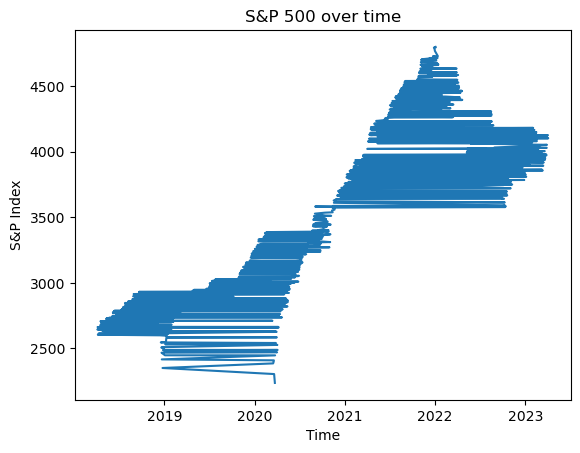

In [11]:
df_sorted = df_financial.sort_values(by = "sp500")
display(df_sorted)

# try plotting date vs. sp500 for df_sorted

plt.plot("date", "sp500", data = df_sorted)
# label x-axis
plt.xlabel("Time")

# label y-axis
plt.ylabel("S&P Index")
# title
plt.title("S&P 500 over time")
plt.show()



<font size = "4">

**Exercise:**

How would I generate a plot of time vs. Dow Jones Industrial Average?

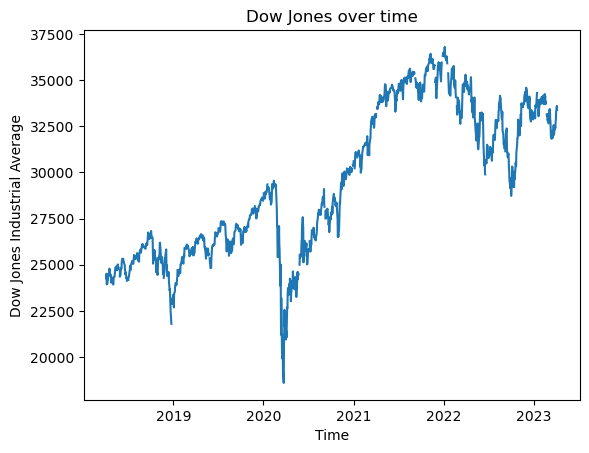

In [12]:
# Write your own code

plt.plot("date", "djia", data = df_financial)
# label x-axis
plt.xlabel("Time")

# label y-axis
plt.ylabel("Dow Jones Industrial Average")
# title
plt.title("Dow Jones over time")
plt.show()



<font size = "4">

- How do we plot multiple columns of the dataset? 
- For instance, let's plot both time vs. S&P 500 and time vs. Dow Jones
- Each DataFrame has its own ``.plot`` method.

In [13]:
# Step 1 of chain:
# Grab columns we want to plot

df_financial[   ["date","sp500","djia"]   ]

,date,sp500,djia
0,2018-04-04,2644.69,24264.30
1,2018-04-05,2662.84,24505.22
2,2018-04-06,2604.47,23932.76
3,2018-04-09,2613.16,23979.10
4,2018-04-10,2656.87,24408.00
...,...,...,...
1300,2023-03-29,4027.81,32717.60
1301,2023-03-30,4050.83,32859.03
1302,2023-03-31,4109.31,33274.15
1303,2023-04-03,4124.51,33601.15


In [14]:
# Step 2 of chain:
# We will plot the date on the x-axis.
# So we will make "date" the index column

df_financial[   ["date","sp500","djia"]   ].set_index("date")

,sp500,djia
date,,
2018-04-04,2644.69,24264.30
2018-04-05,2662.84,24505.22
2018-04-06,2604.47,23932.76
2018-04-09,2613.16,23979.10
2018-04-10,2656.87,24408.00
...,...,...
2023-03-29,4027.81,32717.60
2023-03-30,4050.83,32859.03
2023-03-31,4109.31,33274.15


<Axes: xlabel='date'>

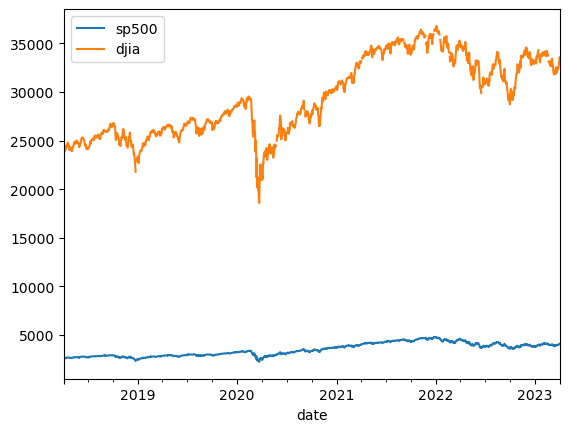

In [15]:
# Step 3 of chain:
# We will use the DataFrame's .plot method.
# This will plot index vs. column 1 AND
# will plot index vs. column 2

df_financial[   ["date","sp500","djia"]   ].set_index("date").plot()

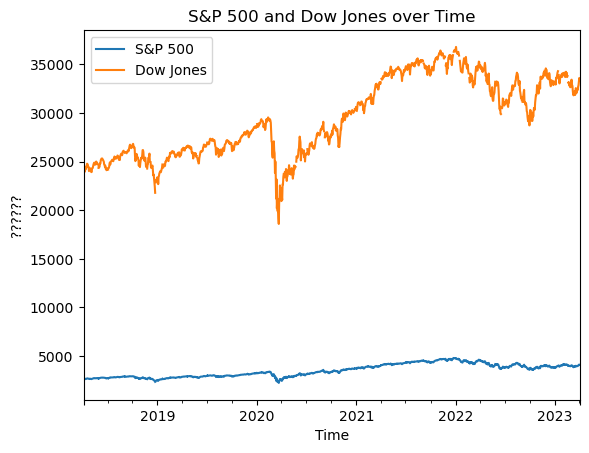

In [16]:
# .plot() used column names for the legend and x-axis.
# Here's how to adjust them ourselves

ax = df_financial[   ["date","sp500","djia"]   ].set_index("date").plot()
ax.set_title("S&P 500 and Dow Jones over Time")
ax.set_xlabel("Time")
ax.legend( ["S&P 500", "Dow Jones"] )
ax.set_ylabel("??????")
plt.show()

<font size = "4">

The S&P 500 and Dow Jones have different units. Should either:

- Convert one to the other's units
- Have a left and right y-axis, one for each variable (more on this in a future lecture).
- Plot a "unitless" or "non-dimensional" measure of both.

The **percentage growth** is a non-dimensional quantity we can calculate for both:

$$\textrm{per. growth} = \frac{(\textrm{today's index}) - (\textrm{yesterday's index})}{\textrm{yesterdays's index}} \times 100\  \%$$

In [17]:
# Let's calculate the numerator: the difference between today's index 
# and yesterday's index.

df_financial["diff_sp500"] = df_financial["sp500"].diff()

display(df_financial[["date", "sp500", "diff_sp500"]])


,date,sp500,diff_sp500
0,2018-04-04,2644.69,NaN
1,2018-04-05,2662.84,18.15
2,2018-04-06,2604.47,-58.37
3,2018-04-09,2613.16,8.69
4,2018-04-10,2656.87,43.71
...,...,...,...
1300,2023-03-29,4027.81,56.54
1301,2023-03-30,4050.83,23.02
1302,2023-03-31,4109.31,58.48
1303,2023-04-03,4124.51,15.20


<font size = "4">

To easily divide by "yesterday's index", we will shift the "sp500" column down, and make it a new column

In [18]:
# Let's make the denominator: "yesterday's index"
# Also known as the "lag"

# ".shift(1)" computes a new column with the value of "sp500"
# one period before. By convention the first column is assigned
# a missing value

df_financial["lag_sp500"] = df_financial["sp500"].shift(1)

display(df_financial[["date", "sp500", "diff_sp500", "lag_sp500"]])

,date,sp500,diff_sp500,lag_sp500
0,2018-04-04,2644.69,NaN,NaN
1,2018-04-05,2662.84,18.15,2644.69
2,2018-04-06,2604.47,-58.37,2662.84
3,2018-04-09,2613.16,8.69,2604.47
4,2018-04-10,2656.87,43.71,2613.16
...,...,...,...,...
1300,2023-03-29,4027.81,56.54,3971.27
1301,2023-03-30,4050.83,23.02,4027.81
1302,2023-03-31,4109.31,58.48,4050.83
1303,2023-04-03,4124.51,15.20,4109.31


In [19]:
# Now we combine ".diff()" and ".shift()" to compute growth rates

df_financial["growth_sp500"] = (df_financial["diff_sp500"]/
    df_financial["lag_sp500"]) * 100

display(df_financial[["date", "sp500", "growth_sp500", "diff_sp500", 
    "lag_sp500"]])

,date,sp500,growth_sp500,diff_sp500,lag_sp500
0,2018-04-04,2644.69,NaN,NaN,NaN
1,2018-04-05,2662.84,0.686281,18.15,2644.69
2,2018-04-06,2604.47,-2.192021,-58.37,2662.84
3,2018-04-09,2613.16,0.333657,8.69,2604.47
4,2018-04-10,2656.87,1.672687,43.71,2613.16
...,...,...,...,...,...
1300,2023-03-29,4027.81,1.423726,56.54,3971.27
1301,2023-03-30,4050.83,0.571526,23.02,4027.81
1302,2023-03-31,4109.31,1.443655,58.48,4050.83
1303,2023-04-03,4124.51,0.369892,15.20,4109.31


<font size = "4">

Now, we plot the growth rate:

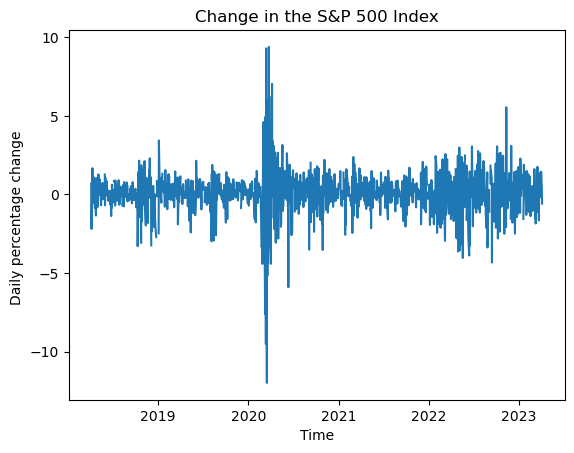

In [20]:
plt.plot("date", "growth_sp500",
          data = df_financial)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("Change in the S&P 500 Index")
plt.show()

<font size = "4" >

**Exercise (I accidentally gave you the solution!)**

- Compute a column with the growth of the Dow Jones
- Plot the growth of the S&P 500 and Dow Jones in a <br>
single plot

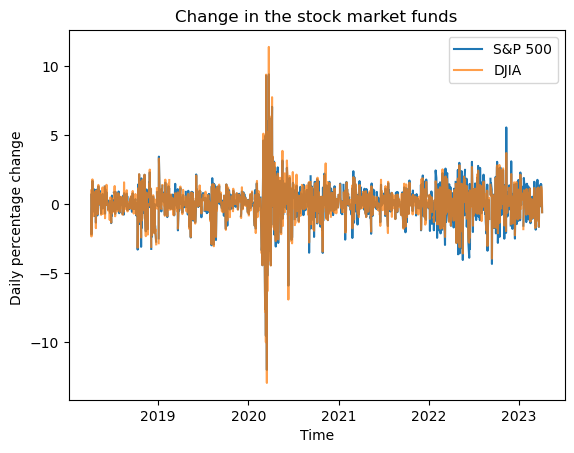

In [21]:
# Write your own code

df_financial["growth_djia"] = (df_financial["djia"].diff()
         / df_financial["djia"].shift(1) )* 100

plt.plot("date", "growth_sp500",
          data = df_financial)
plt.plot("date", "growth_djia",
          data = df_financial,alpha = 0.75)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("Change in the stock market funds")
plt.legend(["S&P 500", "DJIA"])
plt.show()

# <span style="color:red"> III. Subsets of time-series data </span>

<font size = "4" >

Like other DataFrames, we can use ``.query()`` to extract subsets of time-series data. Since we have converted to the "Datetime" datatype, logical conditions can be used in a straightforward way. 

In [22]:
# Since the "date" column has a time format, Python
# will interpret "2019-01-01" as a date inside the query command

subset_before  = df_financial.query('date <= "2019-01-01" ')
subset_after   = df_financial.query('date >= "2019-01-01" ')

display(subset_after)

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,diff_sp500,lag_sp500,growth_sp500,growth_djia
194,1/1/2019,NaN,NaN,January 01 2019,"Tuesday, 2019-01-01",1-Jan-19,2019-01-01,NaN,2506.85,NaN,NaN
195,1/2/2019,2510.03,23346.24,January 02 2019,"Wednesday, 2019-01-02",2-Jan-19,2019-01-02,NaN,NaN,NaN,NaN
196,1/3/2019,2447.89,22686.22,January 03 2019,"Thursday, 2019-01-03",3-Jan-19,2019-01-03,-62.14,2510.03,-2.475668,-2.827093
197,1/4/2019,2531.94,23433.16,January 04 2019,"Friday, 2019-01-04",4-Jan-19,2019-01-04,84.05,2447.89,3.433569,3.292483
198,1/7/2019,2549.69,23531.35,January 07 2019,"Monday, 2019-01-07",7-Jan-19,2019-01-07,17.75,2531.94,0.701043,0.419022
...,...,...,...,...,...,...,...,...,...,...,...
1300,3/29/2023,4027.81,32717.60,March 29 2023,"Wednesday, 2023-03-29",29-Mar-23,2023-03-29,56.54,3971.27,1.423726,0.998171
1301,3/30/2023,4050.83,32859.03,March 30 2023,"Thursday, 2023-03-30",30-Mar-23,2023-03-30,23.02,4027.81,0.571526,0.432275
1302,3/31/2023,4109.31,33274.15,March 31 2023,"Friday, 2023-03-31",31-Mar-23,2023-03-31,58.48,4050.83,1.443655,1.263336
1303,4/3/2023,4124.51,33601.15,April 03 2023,"Monday, 2023-04-03",3-Apr-23,2023-04-03,15.20,4109.31,0.369892,0.982745


<font size = "4">

Here are some other subsets we might be interested in:

In [27]:
# Beginning of Covid pandemic (independent of data)
subset_between = df_financial.query("'2020-03-01' <= date <= '2020-05-01'")

# large changes in percentage growth (positive or negative)
subset_large_change = df_financial.query("growth_sp500 > 5 or growth_sp500 < -5")
display(subset_large_change)

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,diff_sp500,lag_sp500,growth_sp500,growth_djia
503,3/9/2020,2746.56,23851.02,March 09 2020,"Monday, 2020-03-09",9-Mar-20,2020-03-09,-225.81,2972.37,-7.596968,-7.785723
506,3/12/2020,2480.64,21200.62,March 12 2020,"Thursday, 2020-03-12",12-Mar-20,2020-03-12,-260.74,2741.38,-9.511268,-9.988443
507,3/13/2020,2711.02,23185.62,March 13 2020,"Friday, 2020-03-13",13-Mar-20,2020-03-13,230.38,2480.64,9.287119,9.362934
508,3/16/2020,2386.13,20188.52,March 16 2020,"Monday, 2020-03-16",16-Mar-20,2020-03-16,-324.89,2711.02,-11.984050,-12.926547
509,3/17/2020,2529.19,21237.38,March 17 2020,"Tuesday, 2020-03-17",17-Mar-20,2020-03-17,143.06,2386.13,5.995482,5.195329
510,3/18/2020,2398.10,19898.92,March 18 2020,"Wednesday, 2020-03-18",18-Mar-20,2020-03-18,-131.09,2529.19,-5.183082,-6.302378
514,3/24/2020,2447.33,20704.91,March 24 2020,"Tuesday, 2020-03-24",24-Mar-20,2020-03-24,209.93,2237.40,9.382766,11.365038
516,3/26/2020,2630.07,22552.17,March 26 2020,"Thursday, 2020-03-26",26-Mar-20,2020-03-26,154.51,2475.56,6.241416,6.375401
523,4/6/2020,2663.68,22679.99,April 06 2020,"Monday, 2020-04-06",6-Apr-20,2020-04-06,175.03,2488.65,7.033130,7.730472
571,6/11/2020,3002.10,25128.17,June 11 2020,"Thursday, 2020-06-11",11-Jun-20,2020-06-11,-188.04,3190.14,-5.894412,-6.898187


In [28]:
# alternate way. 
# Datetime objects have a ".between()" method

subset_between = df_financial.query("date.between('2020-03-01', '2020-05-01')")
display(subset_between)

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,diff_sp500,lag_sp500,growth_sp500,growth_djia
498,3/2/2020,3090.23,26703.32,March 02 2020,"Monday, 2020-03-02",2-Mar-20,2020-03-02,136.01,2954.22,4.603923,5.092454
499,3/3/2020,3003.37,25917.41,March 03 2020,"Tuesday, 2020-03-03",3-Mar-20,2020-03-03,-86.86,3090.23,-2.810794,-2.943117
500,3/4/2020,3130.12,27090.86,March 04 2020,"Wednesday, 2020-03-04",4-Mar-20,2020-03-04,126.75,3003.37,4.220259,4.527651
501,3/5/2020,3023.94,26121.28,March 05 2020,"Thursday, 2020-03-05",5-Mar-20,2020-03-05,-106.18,3130.12,-3.392202,-3.578993
502,3/6/2020,2972.37,25864.78,March 06 2020,"Friday, 2020-03-06",6-Mar-20,2020-03-06,-51.57,3023.94,-1.705391,-0.981958
503,3/9/2020,2746.56,23851.02,March 09 2020,"Monday, 2020-03-09",9-Mar-20,2020-03-09,-225.81,2972.37,-7.596968,-7.785723
504,3/10/2020,2882.23,25018.16,March 10 2020,"Tuesday, 2020-03-10",10-Mar-20,2020-03-10,135.67,2746.56,4.939634,4.893459
505,3/11/2020,2741.38,23553.22,March 11 2020,"Wednesday, 2020-03-11",11-Mar-20,2020-03-11,-140.85,2882.23,-4.886841,-5.855507
506,3/12/2020,2480.64,21200.62,March 12 2020,"Thursday, 2020-03-12",12-Mar-20,2020-03-12,-260.74,2741.38,-9.511268,-9.988443
507,3/13/2020,2711.02,23185.62,March 13 2020,"Friday, 2020-03-13",13-Mar-20,2020-03-13,230.38,2480.64,9.287119,9.362934


In [30]:
# alternate way. 
# (x > 5 or x < -5) is equivalent to |x| > 5


subset_large_change = df_financial.query("abs(growth_sp500) > 5")
display(subset_large_change)



,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,diff_sp500,lag_sp500,growth_sp500,growth_djia
503,3/9/2020,2746.56,23851.02,March 09 2020,"Monday, 2020-03-09",9-Mar-20,2020-03-09,-225.81,2972.37,-7.596968,-7.785723
506,3/12/2020,2480.64,21200.62,March 12 2020,"Thursday, 2020-03-12",12-Mar-20,2020-03-12,-260.74,2741.38,-9.511268,-9.988443
507,3/13/2020,2711.02,23185.62,March 13 2020,"Friday, 2020-03-13",13-Mar-20,2020-03-13,230.38,2480.64,9.287119,9.362934
508,3/16/2020,2386.13,20188.52,March 16 2020,"Monday, 2020-03-16",16-Mar-20,2020-03-16,-324.89,2711.02,-11.984050,-12.926547
509,3/17/2020,2529.19,21237.38,March 17 2020,"Tuesday, 2020-03-17",17-Mar-20,2020-03-17,143.06,2386.13,5.995482,5.195329
510,3/18/2020,2398.10,19898.92,March 18 2020,"Wednesday, 2020-03-18",18-Mar-20,2020-03-18,-131.09,2529.19,-5.183082,-6.302378
514,3/24/2020,2447.33,20704.91,March 24 2020,"Tuesday, 2020-03-24",24-Mar-20,2020-03-24,209.93,2237.40,9.382766,11.365038
516,3/26/2020,2630.07,22552.17,March 26 2020,"Thursday, 2020-03-26",26-Mar-20,2020-03-26,154.51,2475.56,6.241416,6.375401
523,4/6/2020,2663.68,22679.99,April 06 2020,"Monday, 2020-04-06",6-Apr-20,2020-04-06,175.03,2488.65,7.033130,7.730472
571,6/11/2020,3002.10,25128.17,June 11 2020,"Thursday, 2020-06-11",11-Jun-20,2020-06-11,-188.04,3190.14,-5.894412,-6.898187


<font size = "4">

Once we have identified an interesting subset of the data, we might want to visualize it within the context of the original time-series. For example, we might want to **highlight** these regions after plotting the entire series.

We can do this using the ``fill_between`` function from the ``matplotlib.pyplot`` library

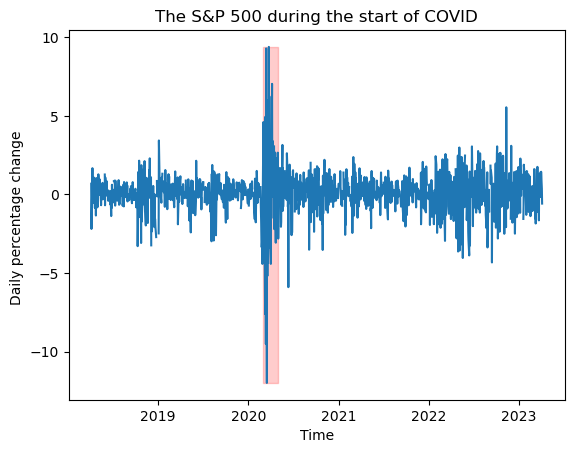

In [31]:
# Create a line plot
plt.plot("date", "growth_sp500", data = df_financial)
plt.xlabel("Time")
plt.ylabel("Daily percentage change ")
plt.title("The S&P 500 during the start of COVID")

# Add a shaded region wth a rectangle
# "x" is the x-coordinates, "y1" and "y2" are the lower
# and upper bounds of the rectangle. We can set this
# to be the minimum and maximum of the outcome.
# we use "where" to test a logical condition

x_vals = df_financial["date"]
y_vals = df_financial["growth_sp500"]
condition = df_financial["date"].between("2020-03-01","2020-05-01")

plt.fill_between(x = x_vals,
                 y1 = y_vals.min(),
                 y2 = y_vals.max(),
                 where = condition,
                 alpha = 0.2,color = "red")


plt.show()

<font size = "4">

- If we want to repeatedly refer to this region of the data, it might be a good idea to add a column to the DataFrame which will indicate which rows are part of the range.

- We can "flag" the data, and add a column of Boolean type to the DataFrame

In [32]:
# Add a column called "covid_period" of Boolean type.
# "True" if date is between March 1st, 2020 and May 1st, 2020
df_financial["covid_period"]  = df_financial["date"].between("2020-03-01","2020-05-01")

display(df_financial.head())
display(df_financial.dtypes)

,date_str,sp500,djia,date_ex1,date_ex2,date_ex3,date,diff_sp500,lag_sp500,growth_sp500,growth_djia,covid_period
0,4/4/2018,2644.69,24264.30,April 04 2018,"Wednesday, 2018-04-04",4-Apr-18,2018-04-04,NaN,NaN,NaN,NaN,False
1,4/5/2018,2662.84,24505.22,April 05 2018,"Thursday, 2018-04-05",5-Apr-18,2018-04-05,18.15,2644.69,0.686281,0.992899,False
2,4/6/2018,2604.47,23932.76,April 06 2018,"Friday, 2018-04-06",6-Apr-18,2018-04-06,-58.37,2662.84,-2.192021,-2.336074,False
3,4/9/2018,2613.16,23979.10,April 09 2018,"Monday, 2018-04-09",9-Apr-18,2018-04-09,8.69,2604.47,0.333657,0.193626,False
4,4/10/2018,2656.87,24408.00,April 10 2018,"Tuesday, 2018-04-10",10-Apr-18,2018-04-10,43.71,2613.16,1.672687,1.788641,False


date_str                object
sp500                  float64
djia                   float64
date_ex1                object
date_ex2                object
date_ex3                object
date            datetime64[ns]
diff_sp500             float64
lag_sp500              float64
growth_sp500           float64
growth_djia            float64
covid_period              bool
dtype: object

<font size = "4">

**Exercise**

- Generate a plot of the percentage growth rate of the Dow Jones 
- Highlight regions where there was growth higher than 3\%
or below -3\%

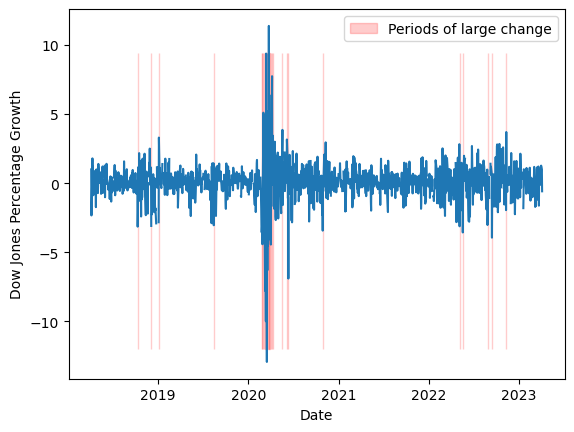

In [ ]:
# Create a line plot

plt.plot("date", "growth_djia", data = df_financial, 
    label="_nolegend_")
plt.xlabel("Date")
plt.ylabel("Dow Jones Percentage Growth")


# Add shaded region(s) with plt.fill_between
condition = abs(df_financial["growth_djia"]) > 3

plt.fill_between(x = x_vals,
                 y1 = y_vals.min(),
                 y2 = y_vals.max(),
                 where = condition,
                 alpha = 0.2,color = "red",
                 label = "Periods of large change")

plt.legend()

# show the plot
plt.show()